In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# 데이터 로드
data = pd.read_csv('./data/직항_머신러닝.csv')
df = data.copy()

In [11]:
df.head()

,nights,departure_sdt,departure_jt,dep_week,arrival_sdt,arrival_jt,arr_week,agentcode,partition_0,partition_1,time_zone,baggagetype,total_fare
0,2,2024-05-18 14:45:00.000,350,6,2024-05-20 08:55:00.000,350,1,WHY002,SouthEastAsia,HKG,Asia/Hong_Kong,C,249700
1,2,2024-05-18 12:45:00.000,345,6,2024-05-20 07:15:00.000,335,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
2,2,2024-05-18 12:45:00.000,345,6,2024-05-20 10:40:00.000,340,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
3,2,2024-05-18 14:35:00.000,345,6,2024-05-20 07:15:00.000,335,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600
4,2,2024-05-18 14:35:00.000,345,6,2024-05-20 10:40:00.000,340,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600


In [15]:
def pre_time(df,sincos=False):
    df = df.copy()
    # jt 비행시간 350은 03시간50분으로 230분으로 변환
    df['departure_jt'] = df['departure_jt'].apply(lambda x : str(x).zfill(4)).apply(lambda x : int(x[:2])*60+int(x[2:]))
    df['arrival_jt'] = df['arrival_jt'].apply(lambda x : str(x).zfill(4)).apply(lambda x : int(x[:2])*60+int(x[2:]))

    # str to datetime 형식 변환
    df['departure_sdt'] = pd.to_datetime(df['departure_sdt'])
    df['arrival_sdt'] = pd.to_datetime(df['arrival_sdt'])

    # 시*60 + 분
    df['departure_time'] = df['departure_sdt'].apply(lambda x: x.hour * 60 + x.minute)
    df['arrival_time'] = df['arrival_sdt'].apply(lambda x: x.hour * 60 + x.minute)
    
    if sincos:
        # 출발 도착 시각(하루 1440분 기준) sin cos 변환
        df['departure_time_sin'] = np.sin(2 * np.pi * df['departure_time'] / 1440)
        df['departure_time_cos'] = np.cos(2 * np.pi * df['departure_time'] / 1440)
        df['arrival_time_sin'] = np.sin(2 * np.pi * df['arrival_time'] / 1440)
        df['arrival_time_cos'] = np.cos(2 * np.pi * df['arrival_time'] / 1440)

        # 출발 도착 요일 sin cos 변환
        df['dep_week_sin'] = np.sin(2 * np.pi * df['dep_week'] / 7)
        df['dep_week_cos'] = np.cos(2 * np.pi * df['dep_week'] / 7)
        df['arr_week_sin'] = np.sin(2 * np.pi * df['arr_week'] / 7)
        df['arr_week_cos'] = np.cos(2 * np.pi * df['arr_week'] / 7)
        drop_col = ['departure_sdt','arrival_sdt',
                    'departure_hour','departure_minute','arrival_hour','arrival_minute',
                    'dep_week', 'arr_week']
        df.drop(columns=drop_col,inplace=True)
    else:
        drop_col = ['departure_sdt','arrival_sdt']
        df.drop(columns=drop_col,inplace=True)
    return df

pre_time(df)

,nights,departure_jt,dep_week,arrival_jt,arr_week,agentcode,partition_0,partition_1,time_zone,baggagetype,total_fare,departure_time,arrival_time
0,2,230,6,230,1,WHY002,SouthEastAsia,HKG,Asia/Hong_Kong,C,249700,885,535
1,2,225,6,215,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600,765,435
2,2,225,6,220,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600,765,640
3,2,225,6,215,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600,875,435
4,2,225,6,220,1,TOV025,SouthEastAsia,HKG,Asia/Hong_Kong,NaN,279600,875,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714787,4,155,2,140,6,VGT027,Japan,TYO,Asia/Tokyo,F,373100,445,805
714788,4,155,2,150,6,VGT027,Japan,TYO,Asia/Tokyo,F,373100,445,1030
714789,4,155,2,160,6,VGT027,Japan,TYO,Asia/Tokyo,F,404200,445,620
714790,4,155,2,150,6,VGT027,Japan,TYO,Asia/Tokyo,F,382000,445,670


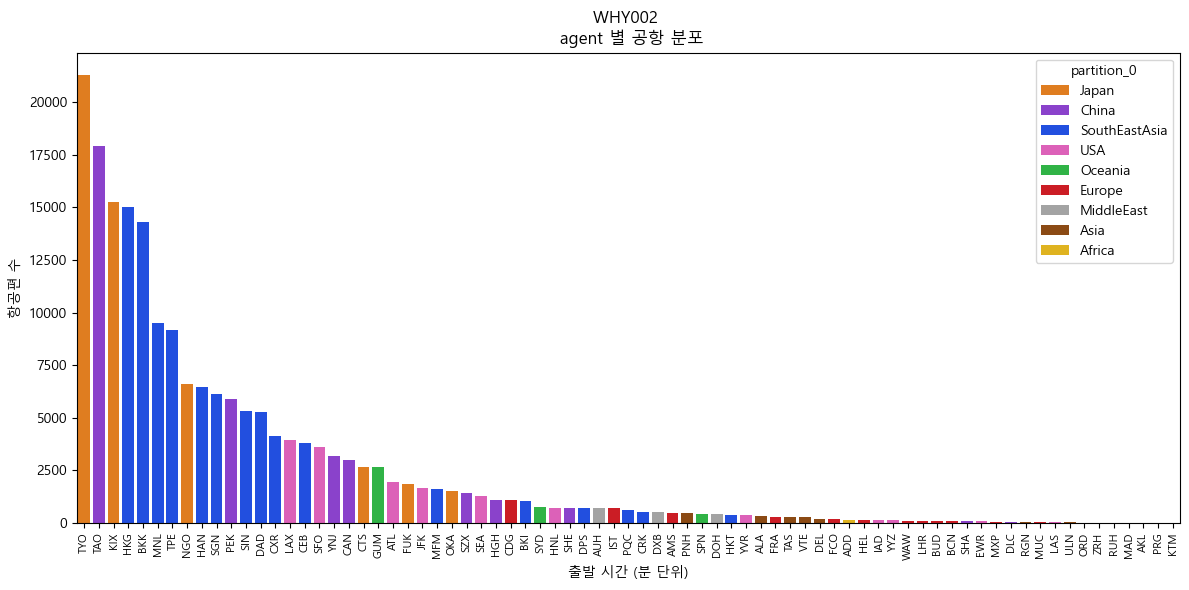

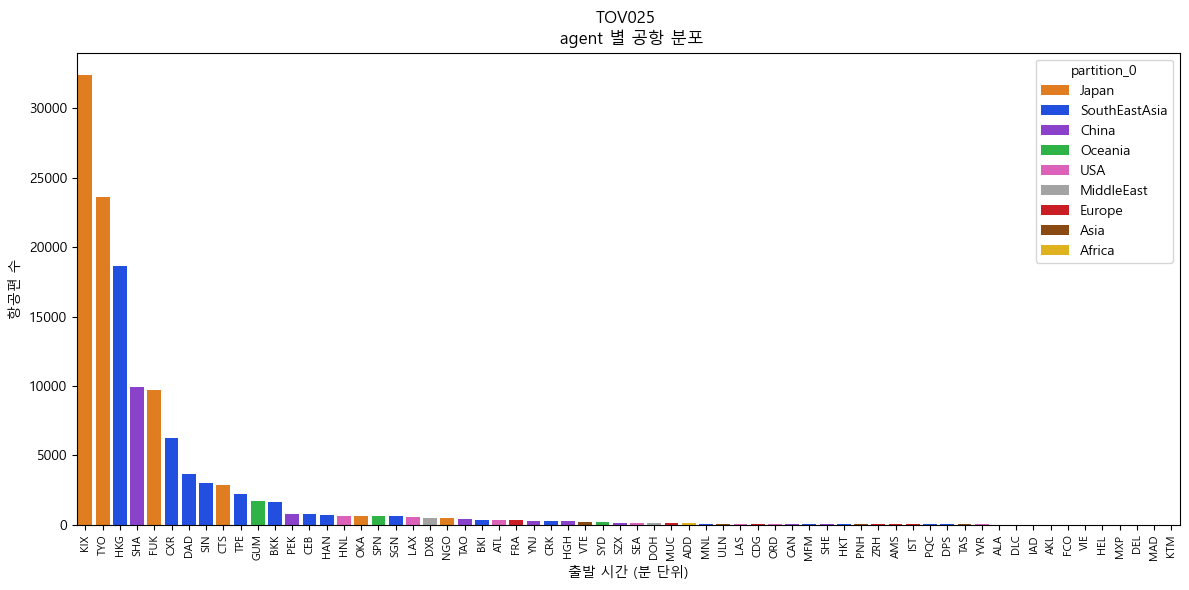

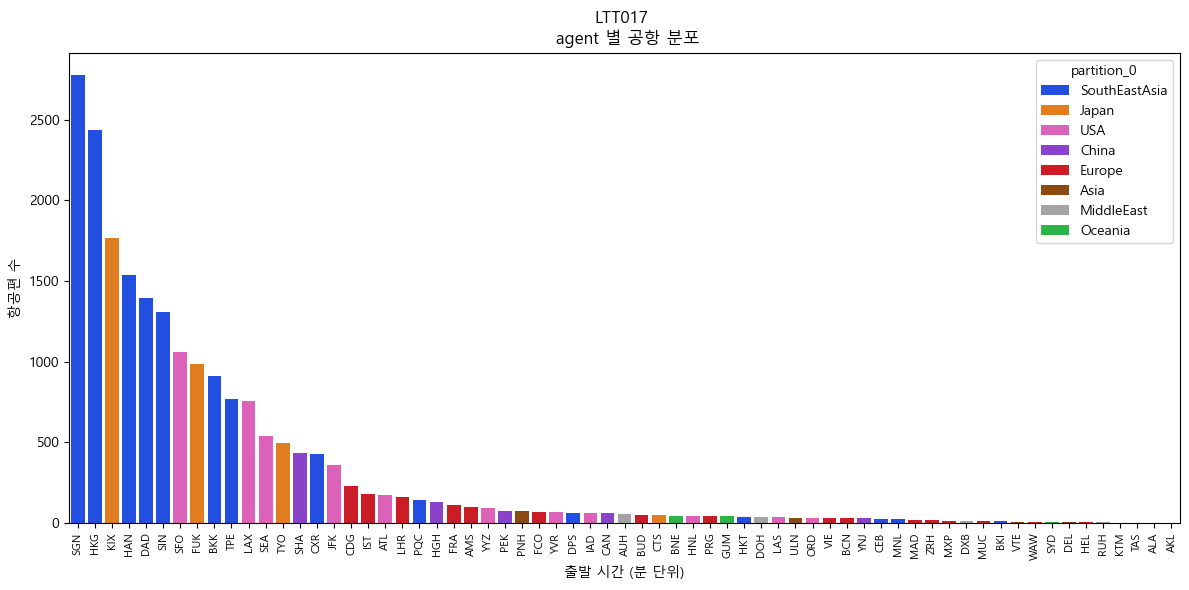

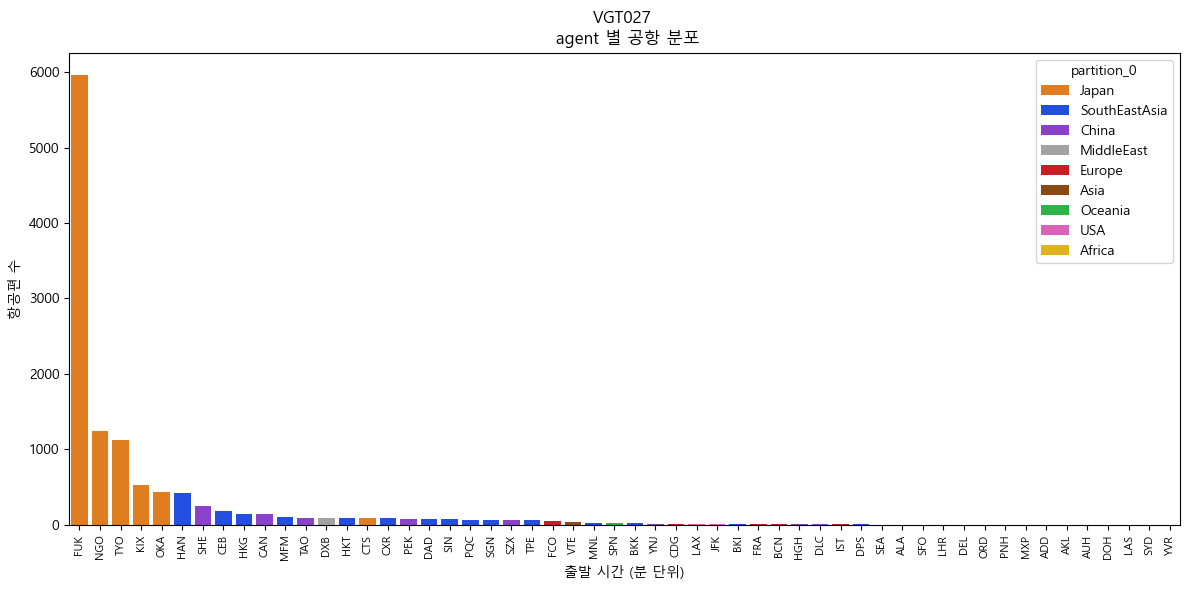

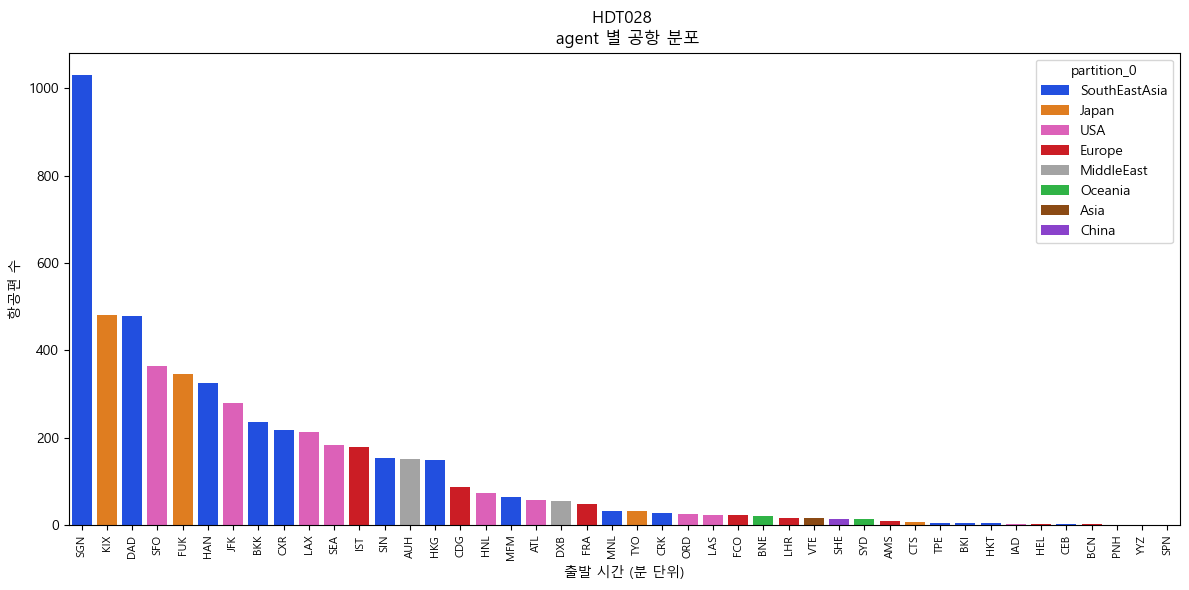

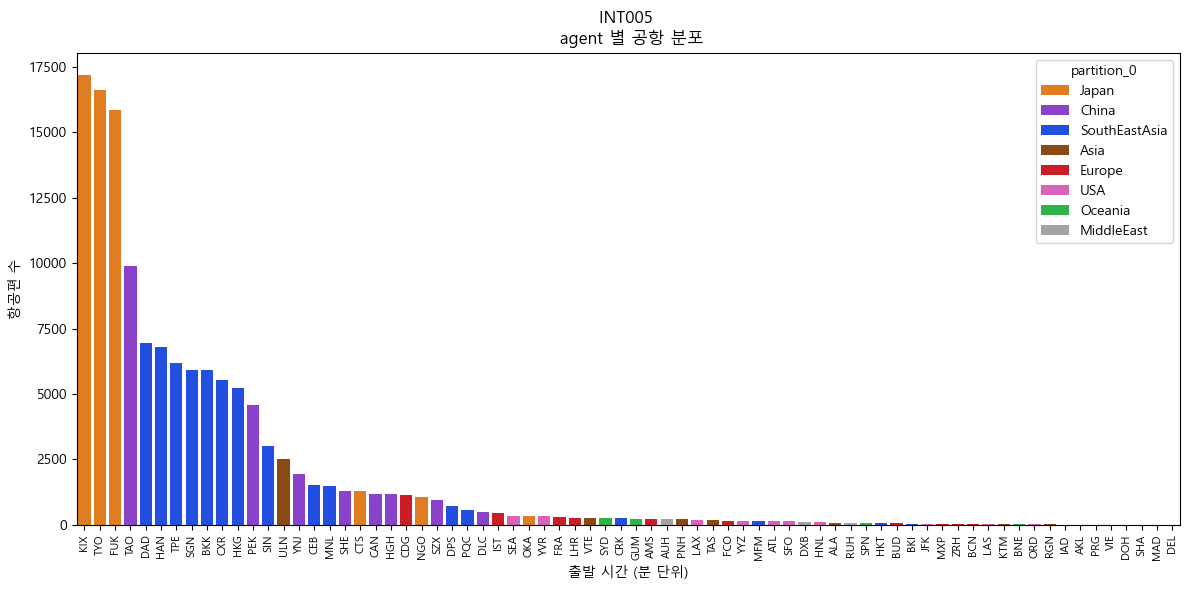

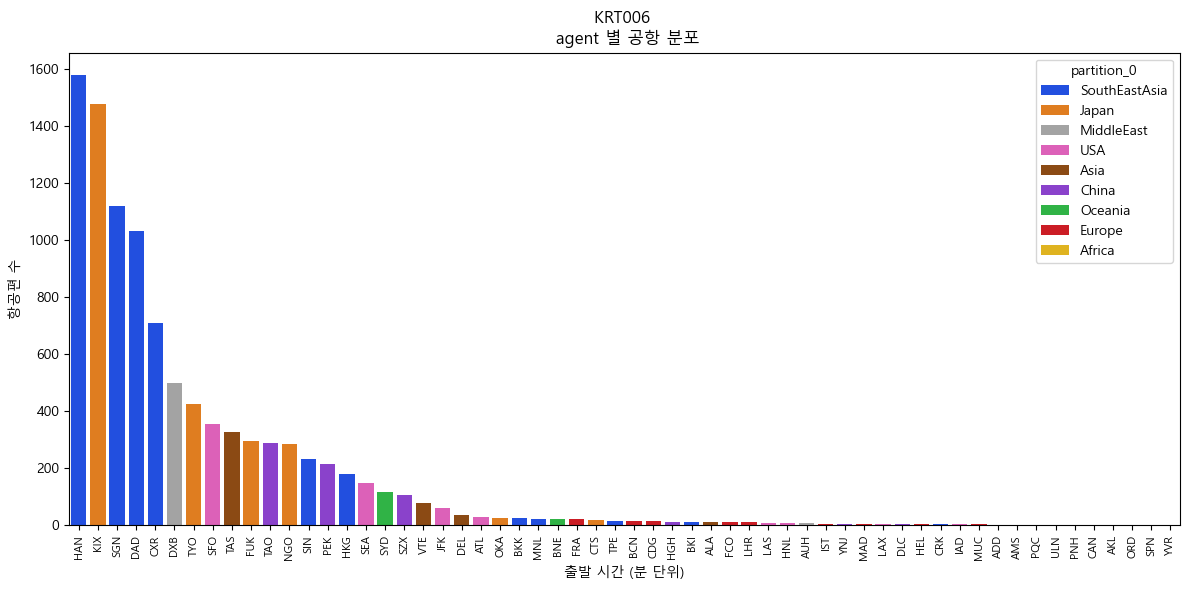

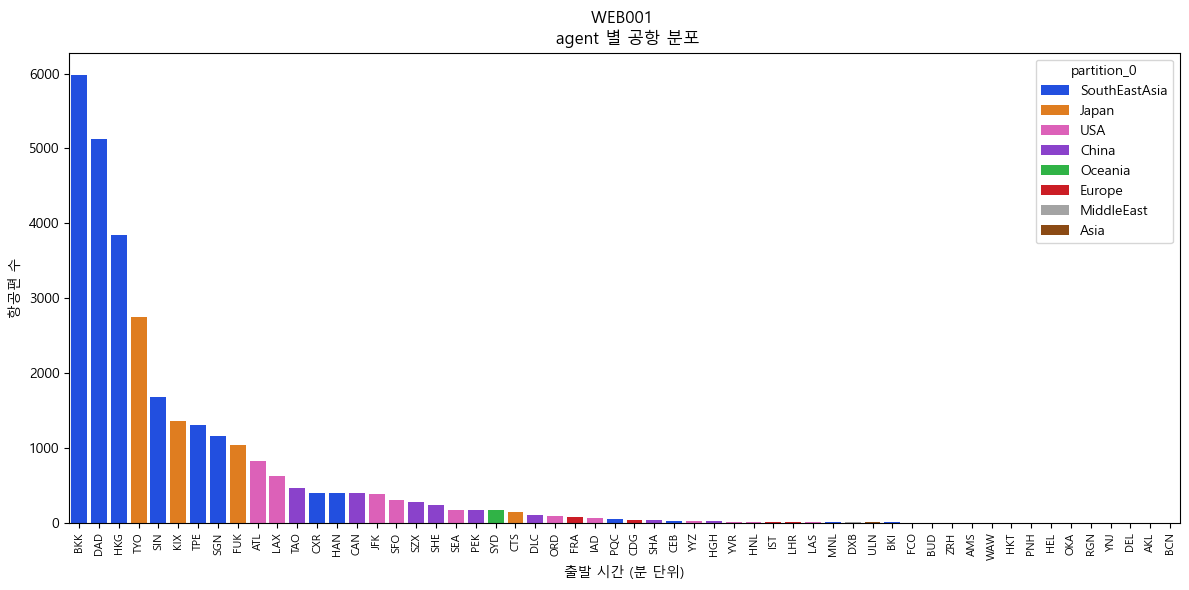

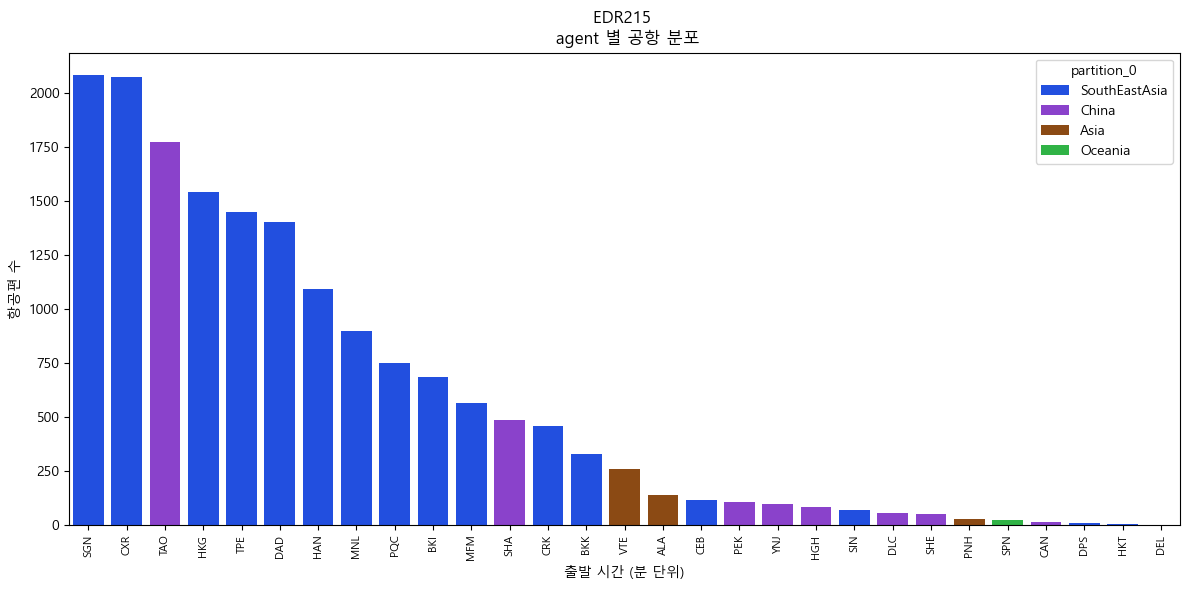

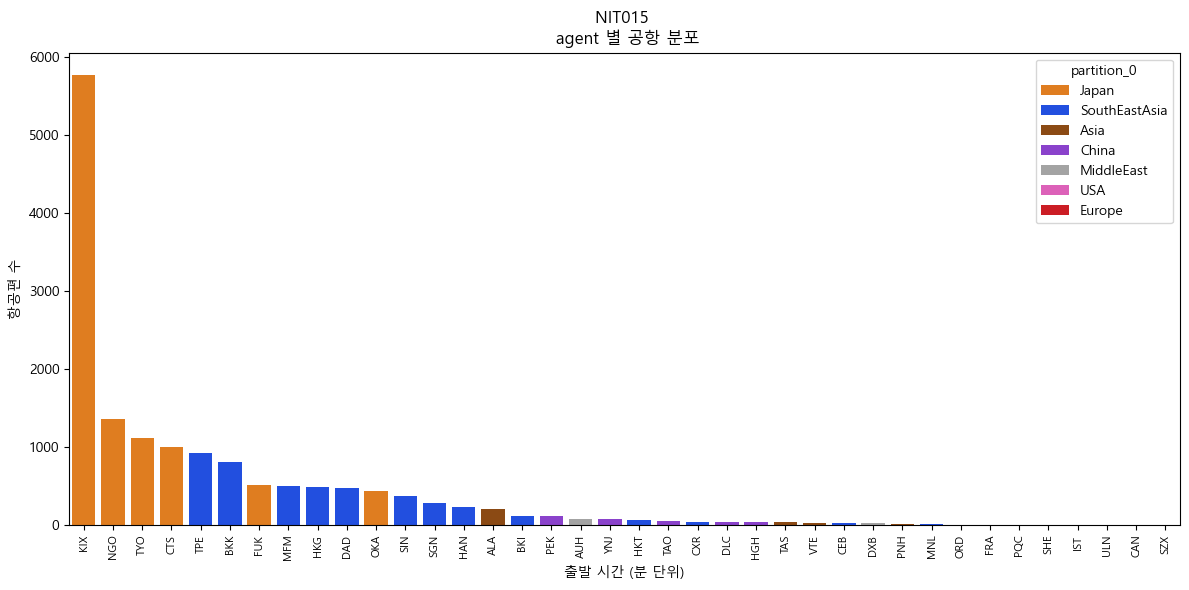

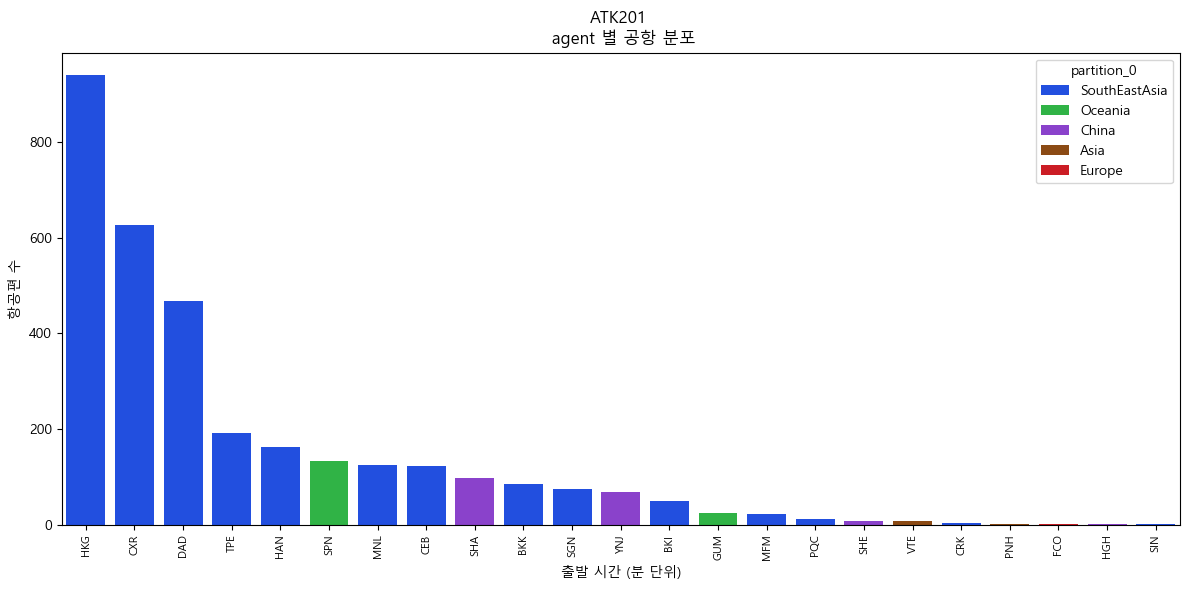

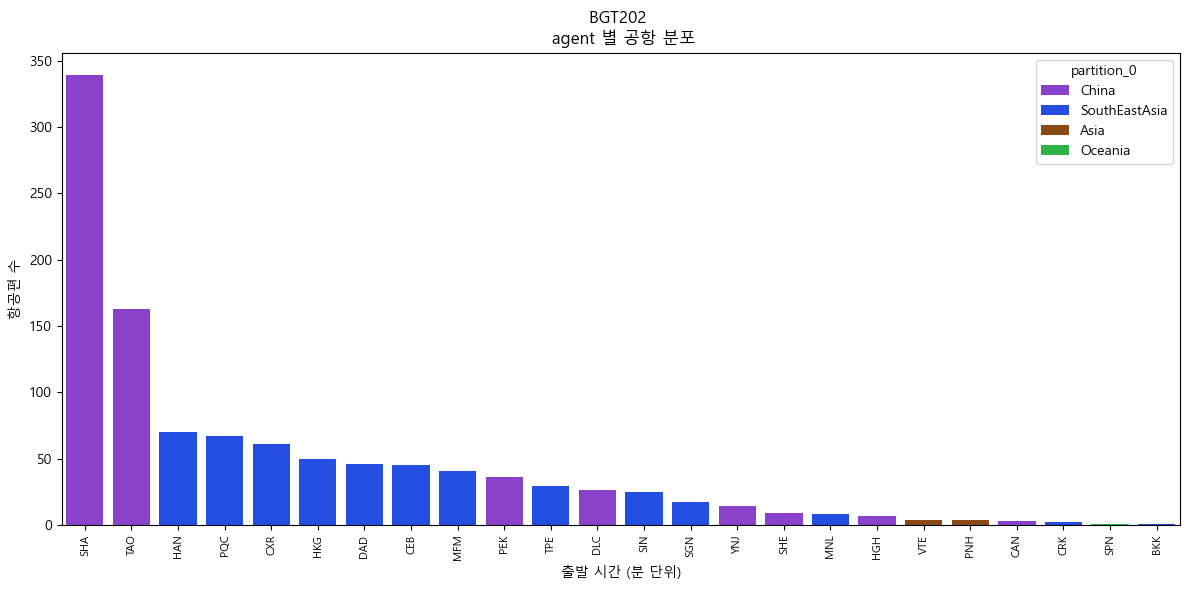

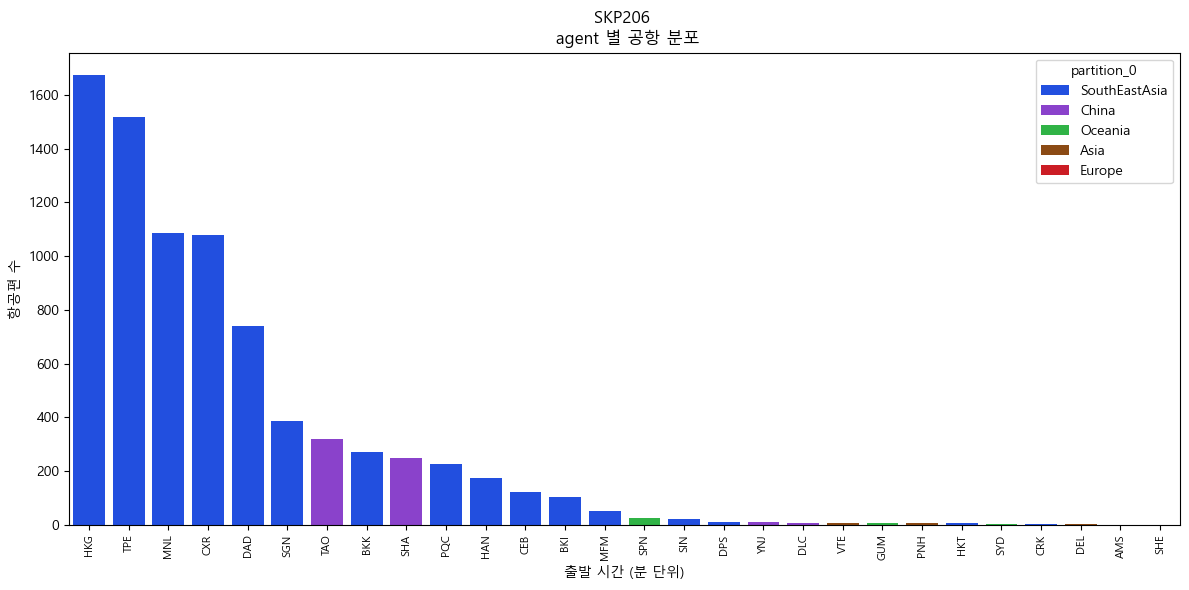

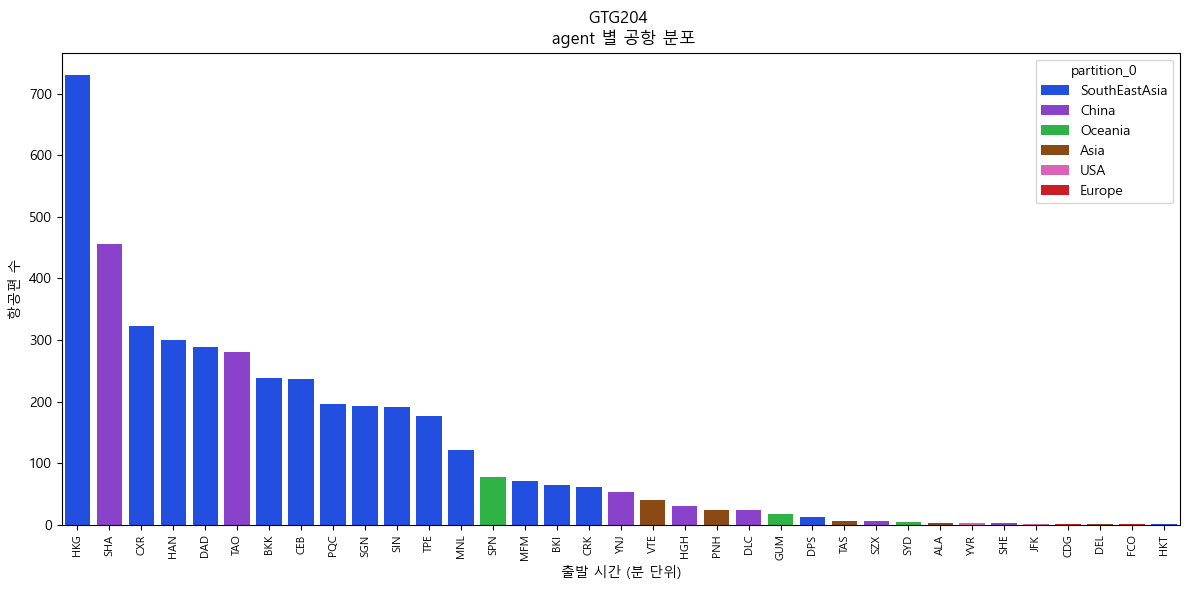

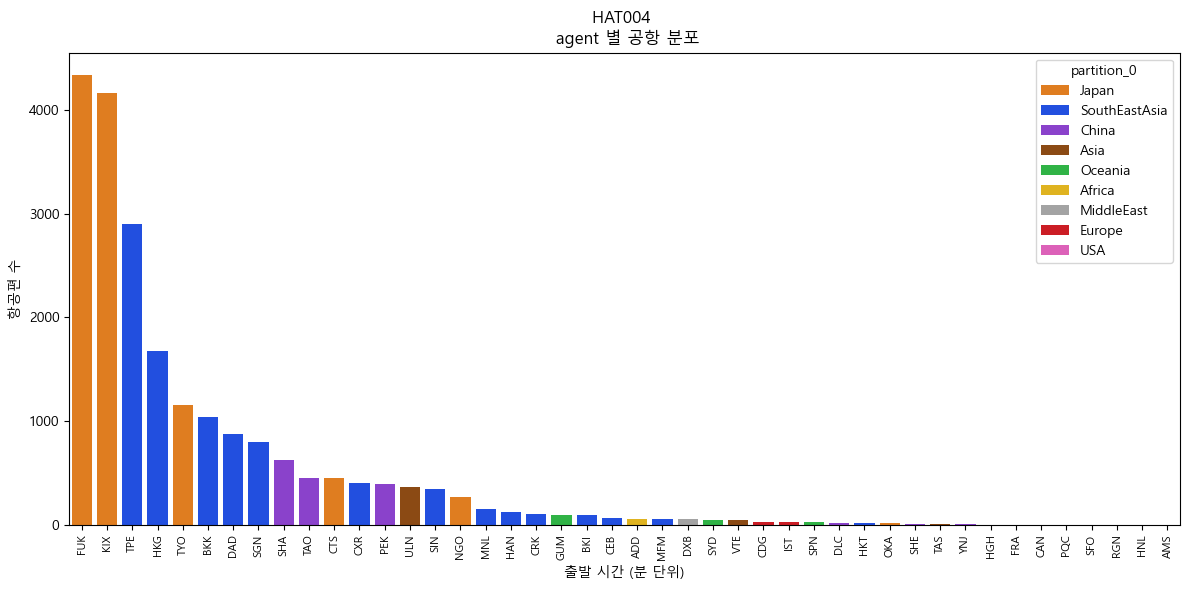

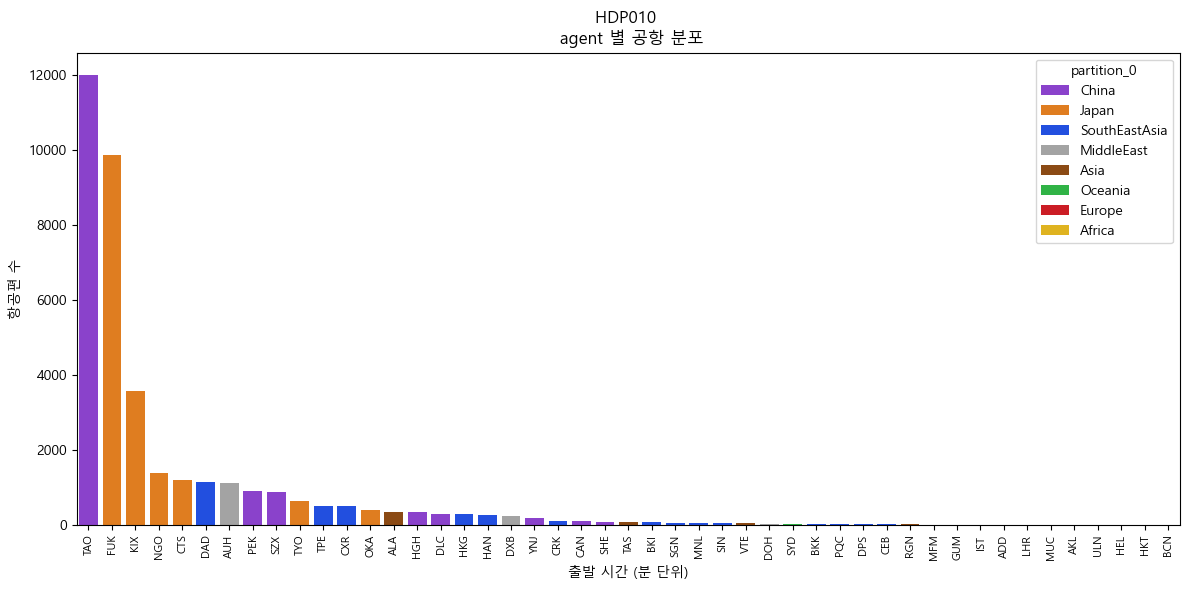

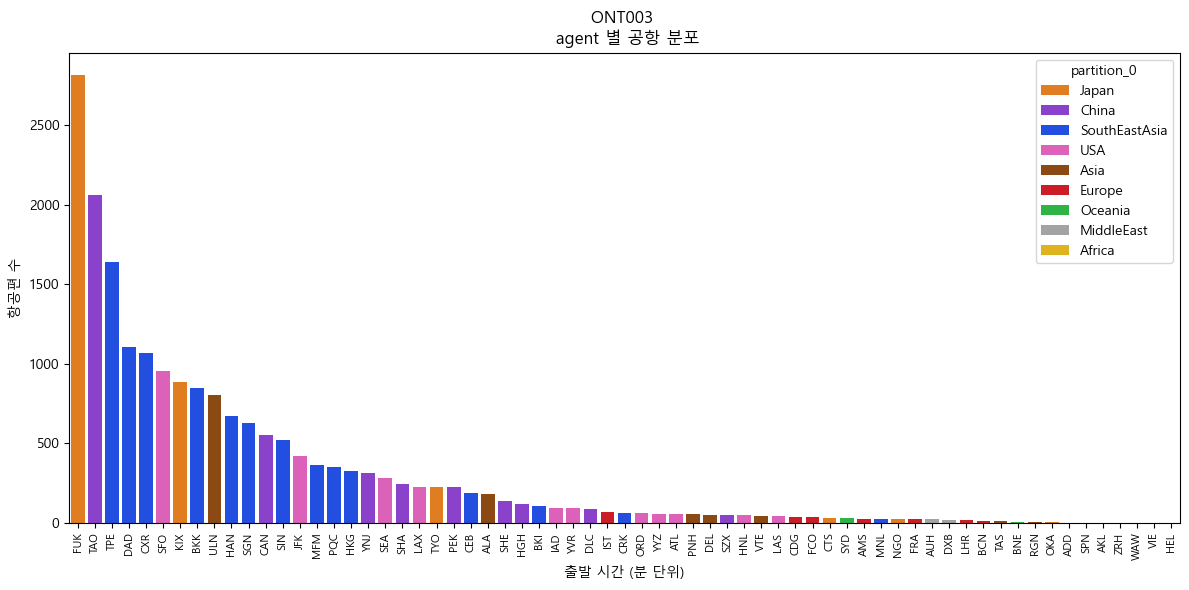

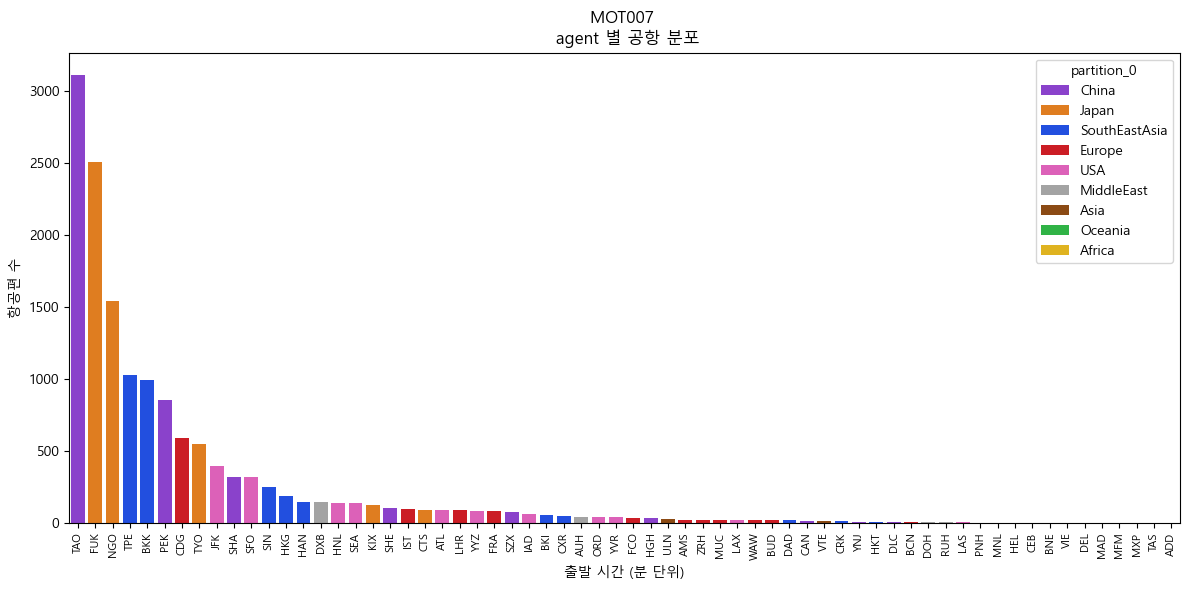

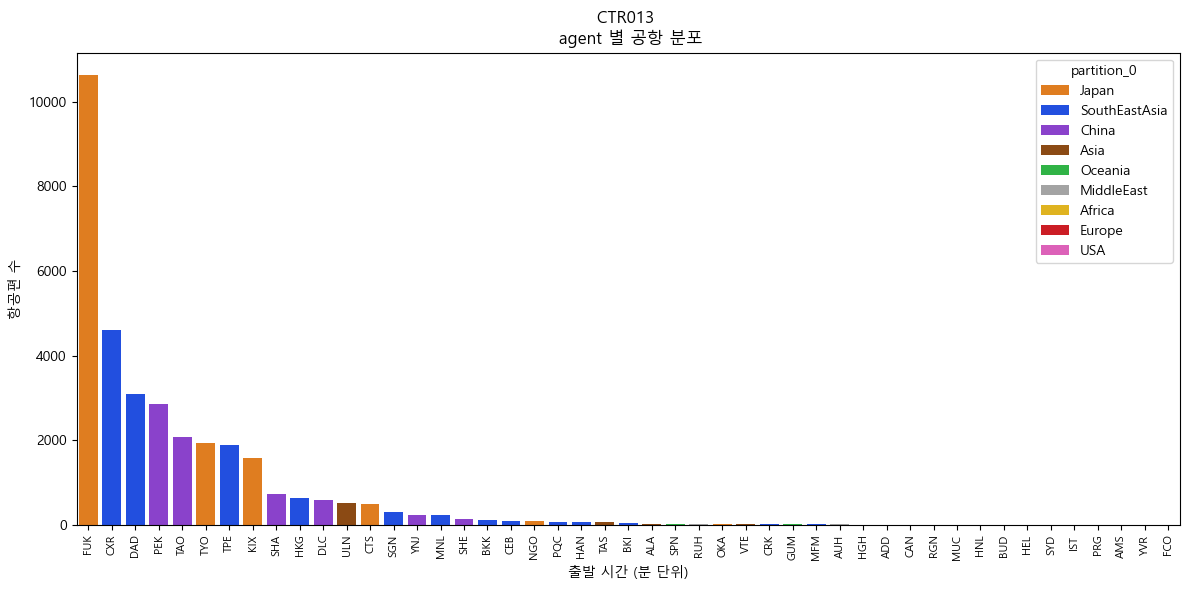

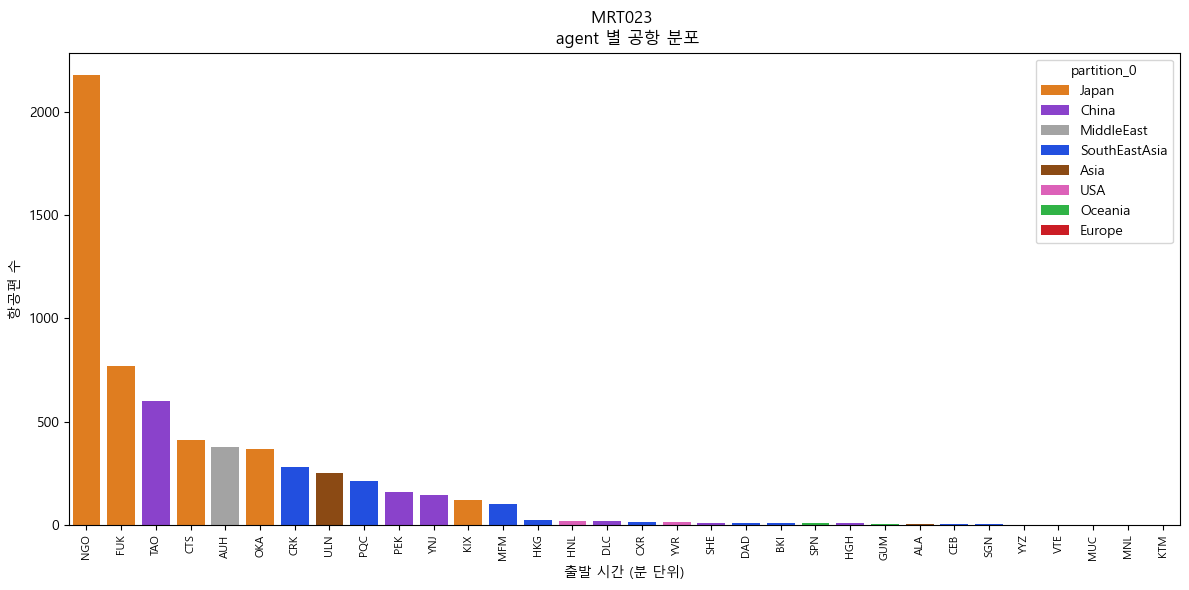

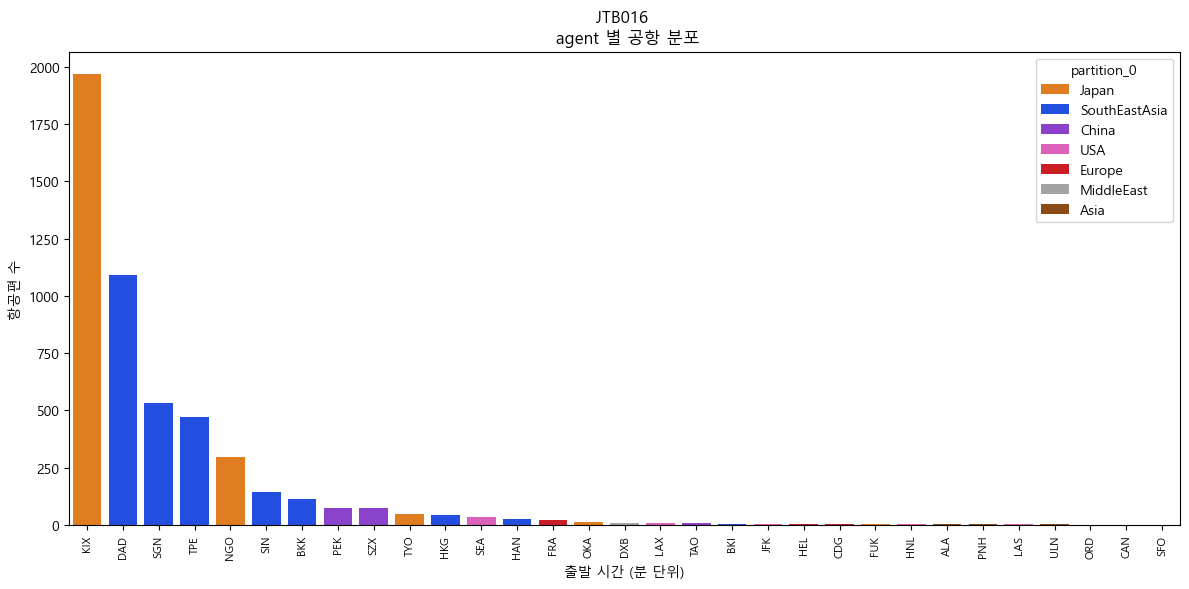

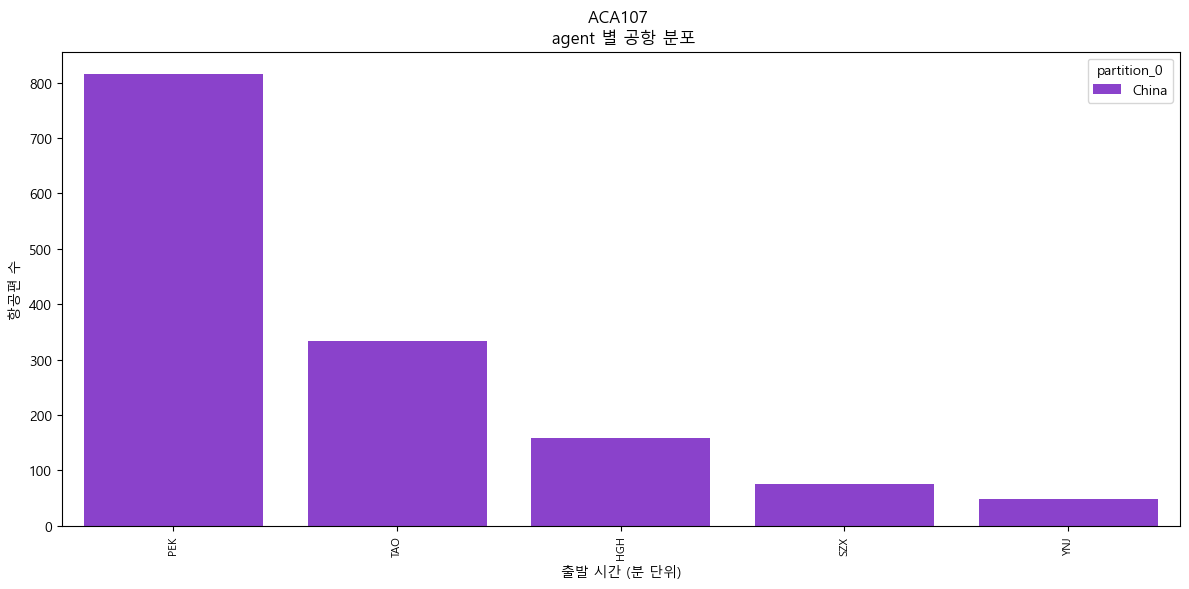

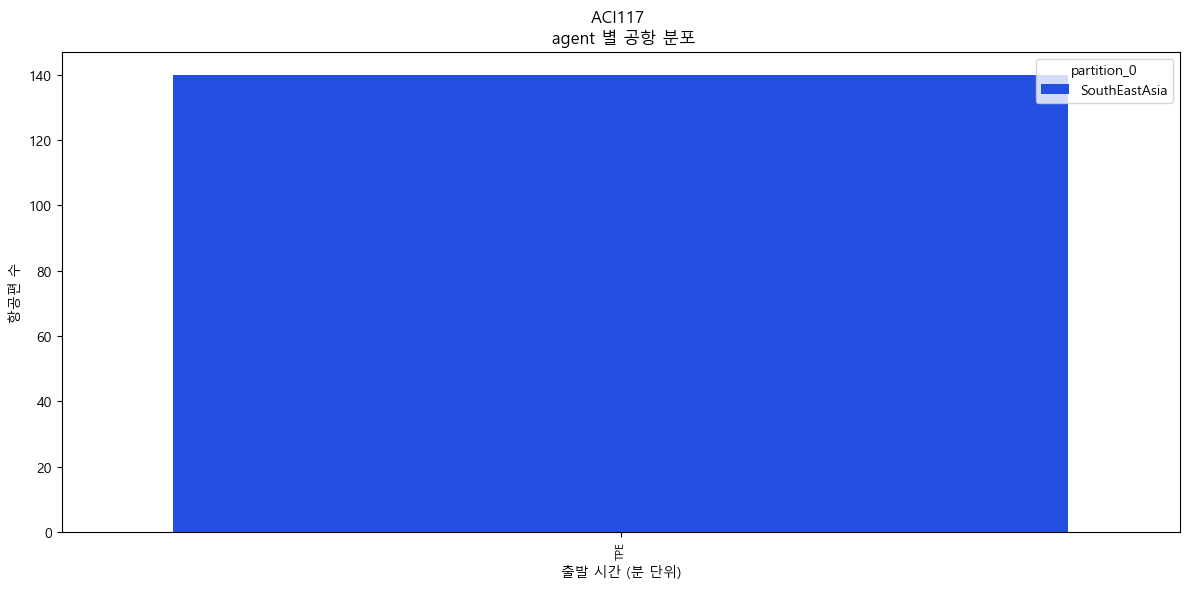

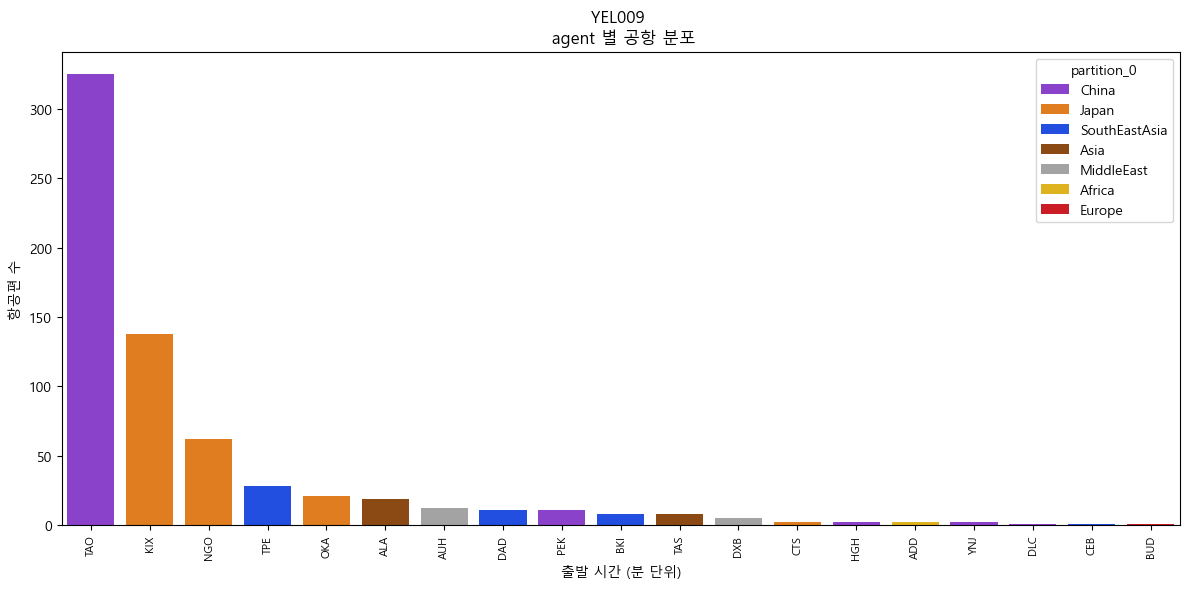

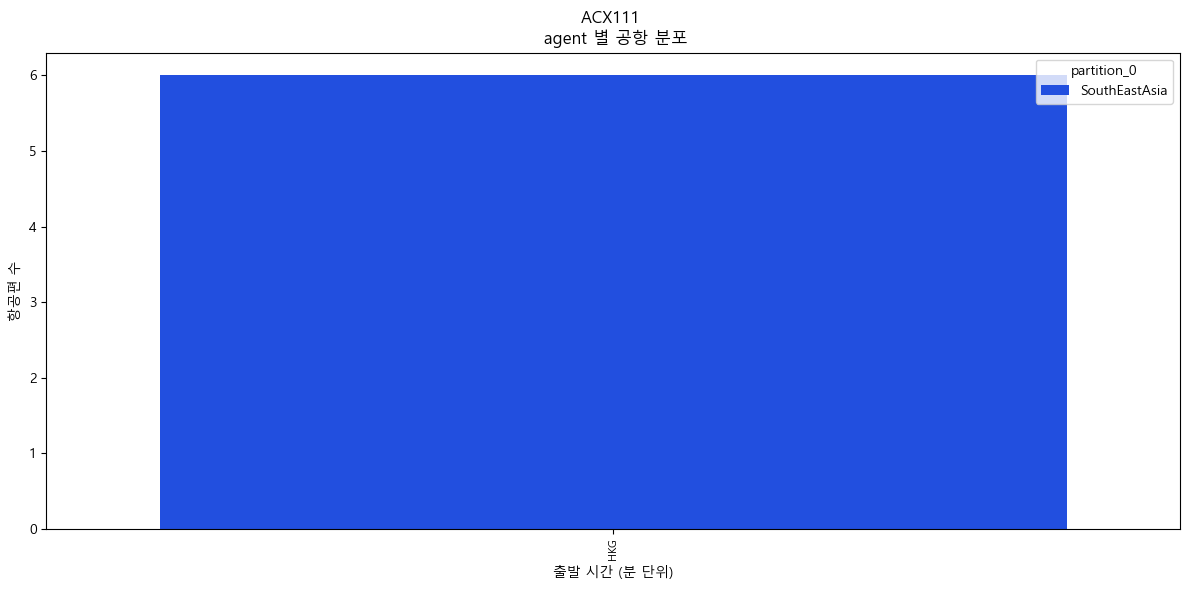

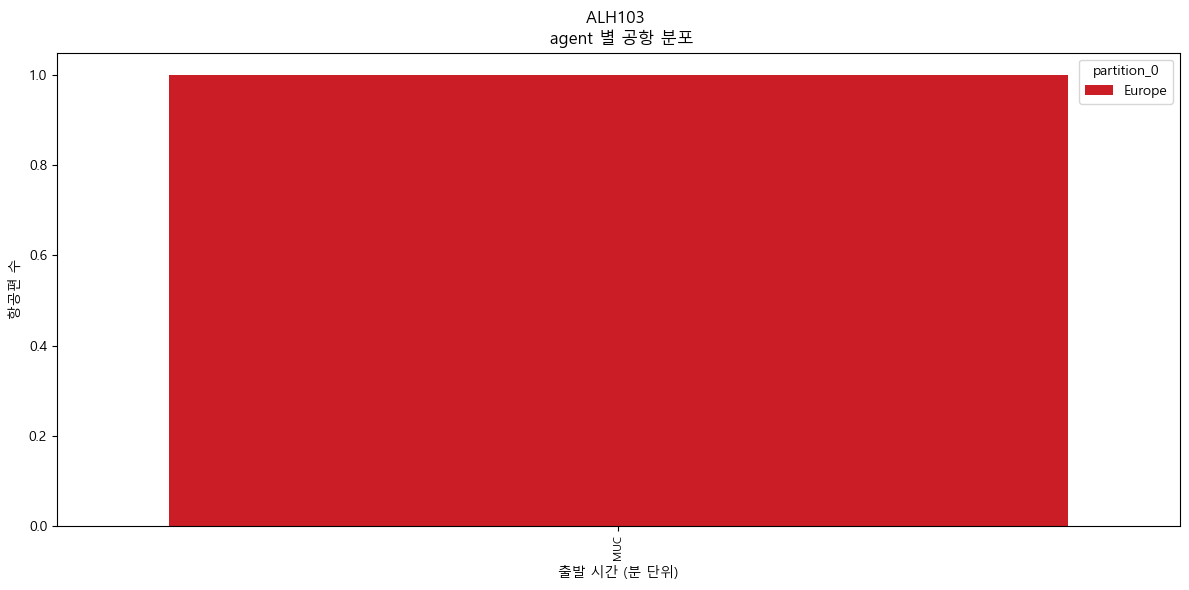

In [32]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from copy import copy
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False


# # 데이터 로드
# data = pd.read_csv('./data/직항_머신러닝.csv')
# df = data.copy()

agent_partition_data = df[['agentcode','partition_1','partition_0' ]].groupby('agentcode').value_counts().reset_index()

unique_partitions = df['partition_0'].unique()
palette = sns.color_palette(palette='bright',n_colors= len(unique_partitions))
color_mapping = dict(zip(unique_partitions, palette))


for agent in df['agentcode'].unique():

    plt.figure(figsize=(12, 6))
    sns.barplot(x='partition_1', y='count',hue ='partition_0',
                data=agent_partition_data.loc[agent_partition_data['agentcode']==agent],
                palette=color_mapping)
    
    plt.xlabel('출발 시간 (분 단위)')
    plt.ylabel('항공편 수')
    plt.title(f'{agent} \n agent 별 공항 분포')
    plt.xticks(rotation=90, size=8)
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()